In [108]:
import pandas as pd
import numpy as np
from __future__ import unicode_literals
from hazm import *
import matplotlib.pyplot as plt

In [109]:
leisureHobbies = {}
vehicles = {}
forTheHome = {}
personal = {}
businesses = {}
electronicDevices = {}
classes = ['leisure-hobbies', 'vehicles', 'for-the-home', 'personal', 'electronic-devices', 'businesses']
arr_freq = [leisureHobbies,vehicles, forTheHome, personal, electronicDevices , businesses]
normalizer=Normalizer()
word_tokenizer=WordTokenizer()
lemmatizer=Lemmatizer()
#stemmer=Stemmer()
stop_set=set(stopwords_list()+['.','،','؛','[',']','{','}','(',')','?','!',':','\"','\'','*','/','+','%','#','-','_','\r\n','\n','«','»','۹','۸','۷','۶','۵','۴','۳','۲','۱','۰'])

In [110]:
train = pd.read_csv('divar_train.csv',encoding='UTF-8')
test = pd.read_csv('divar_test.csv',encoding='UTF-8')

In [111]:
def PreProccessText(text):
    text=normalizer.normalize(text)
    text=word_tokenizer.tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in text if not(word in stop_set)]
#     words=[stemmer.stem(word) for word in text if not(word in stop_set)]
    return words
  

def PreProccess(dataset):
    for i in range(len(dataset)):
        dataset['title'][i]=PreProccessText(dataset['title'][i])
        dataset['description'][i]=PreProccessText(dataset['description'][i])
    return dataset

In [112]:
train=PreProccess(train)
train["title"] = train["title"] + train["description"]
del train['description']
train

,title,categories
0,"[بلبل, خرما, عدد, بلبل, خرما, ماهه, جوجه, خودم...",leisure-hobbies
1,"[عینک, اسکی, عینک, اسکی, دبل, لنز, مارک, یو, و...",leisure-hobbies
2,"[تکیه, سر, تویوتا, پرادو, پارچه, سالم, تمیز]",vehicles
3,"[مجسمه, کریستال, ۲۴, ٪, مجسمه, دکوری, کریستال,...",for-the-home
4,"[کیف, ساک, تمیز]",personal
...,...,...
10195,"[ان, هاش, ۸۵, چی, شرط, خشک, ۲۶۰, کار]",vehicles
10196,"[۴۰۵, دوگانه, کارخانه, تمیز, فابریک, حلقه, لاس...",vehicles
10197,"[بخاری, گازی, دودکش, پلار, بخاری, نو, تمیز, هس...",for-the-home
10198,"[نر, کله, برنجی, چتر, سلام, دلیل, کمبود, واسبا...",leisure-hobbies


In [113]:
test_a = PreProccess(test)
test["title"] = test["title"] + test["description"]
del test_a['description']
test_a

,title,categories
0,"[کیف, مجلس, نو, کیف, مجلس, نو, نو]",personal
1,"[دیوار, کوب, نمد, تزیین, جهاز, عروس]",for-the-home
2,"[تیکه, تمیز, سالم, کشو, مخفی, شیک]",for-the-home
3,"[مودم, سلام, مودم, سالم, وسایل, دیگه, ب, کاشت#...",electronic-devices
4,"[۱۸, عددبوقلمون, قیمت, عمده, سلام, تعدای, بوقل...",leisure-hobbies
...,...,...
1795,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت...",businesses
1796,"[میز, مدیریت, کنفرانس, میز, مدیریت, کنفرانس, ت...",businesses
1797,"[باند, aiwa, سالم, اسپیکر]",electronic-devices
1798,"[عروس, هلند, مولد, عروس, هلند, جفت, ویک, تک, ی...",leisure-hobbies


In [114]:
def AddFrequencyOfWords(words,freq_dict):
    global D
    for word in words:
        if not(word in freq_dict):
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1
    return freq_dict

def FrequencyCalculator(train):
    for i in range(len(arr_freq)):
        for rec_com_title in train.loc[train['categories']==classes[i],'title']:
            arr_freq[i]=AddFrequencyOfWords(rec_com_title, arr_freq[i])

In [115]:
def calcProbability(freq, totalWords):
    return freq / totalWords


def AdditiveSmoothingProbability(freq, totalWords, totalUniqWords):
    return (freq + 1)/(totalUniqWords + totalWords + 1)

def Classify(test):
    probb = [0] * len(arr_freq)
    for i in range(len(test)):
        for f in range(len(arr_freq)):
            totalWords = 0
            for j in arr_freq[f]:
                totalWords += arr_freq[f][j]
            prob = 1
            for w in ['title']:
                for word in test[w][i]:
                    count = 0
                    if word in arr_freq[f]:
                        count = arr_freq[f][word]
                    prob = prob * calcProbability(count, totalWords)
            probb[f] = prob
        index = probb.index(max(probb))
        predicted_categories.append(classes[index])

In [116]:
predicted_categories=[]
predicted_categories_with_add = []
FrequencyCalculator(train)

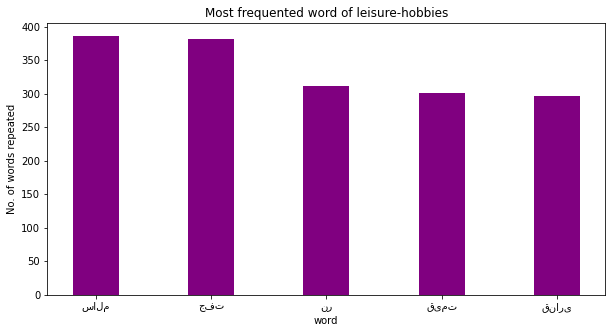

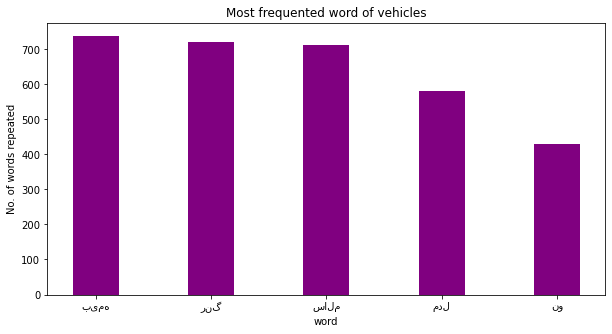

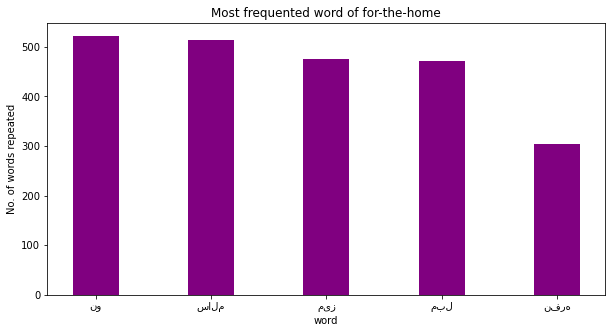

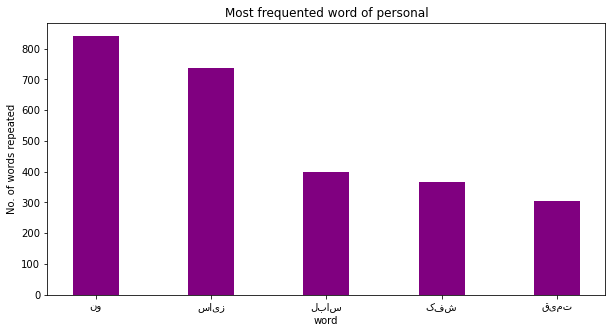

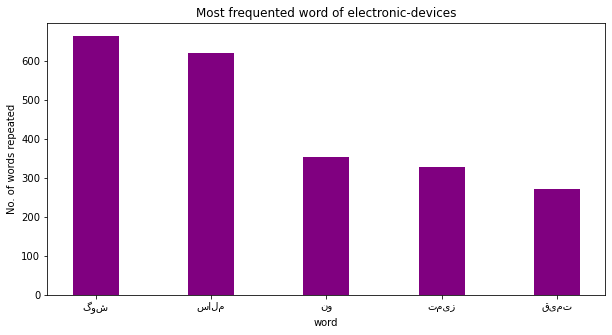

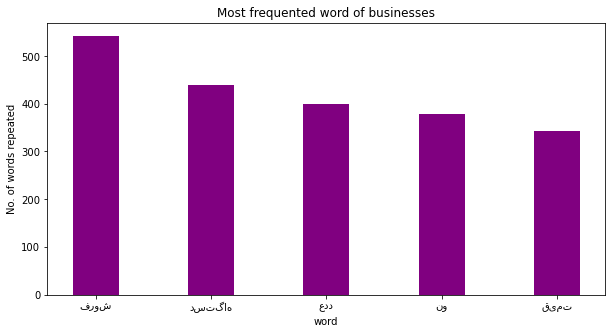

In [117]:
def barPlot(index, freq):
    sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    top = sort_orders[0:5]
    courses = []
    values = []
    for item in top:
        courses.append(item[0])
        values.append(item[1])
    
    plt.figure(figsize = (10, 5))
    plt.bar(courses, values, color ='purple', width = 0.4)

    plt.xlabel("word")
    plt.ylabel("No. of words repeated")
    plt.title("Most frequented word of "+classes[index])
    plt.show()

for f in range(len(arr_freq)):
    barPlot(f, arr_freq[f])

In [118]:
def Evaluate(test):
    correct_detected=0
    total=len(test)
    Precision = [0]* len(classes)
    Recall = [0]* len(classes)
    F1 = [0]* len(classes)
    correct_detected_class = [0]* len(classes)
    all_detected_class = [0]* len(classes)
    total_class = [0]* len(classes)

    counter=0
    X=[]

    for description_cursor in range(len(test)):
        if test['categories'][description_cursor] == test['predicted categories'][description_cursor]:
            correct_detected+=1
        elif counter<5:
            counter+=1
            X.append(description_cursor)
        for i in range(len(classes)):
            if test['predicted categories'][description_cursor]==classes[i] and test['categories'][description_cursor] == classes[i]:
                correct_detected_class[i]+=1
            if test['predicted categories'][description_cursor] == classes[i]:
                all_detected_class[i]+=1
            if test['categories'][description_cursor] == classes[i]:
                total_class[i]+=1
            
    Accuracy = correct_detected / total * 100
    macroF1 = 0
    for i in range(len(classes)):
        Precision[i] = correct_detected_class[i]/all_detected_class[i]*100
        Recall[i] = correct_detected_class[i] / total_class[i]*100
        F1[i]=2*Precision[i]*Recall[i]/(Precision[i]+Recall[i])
        macroF1 += F1[i]
        print(classes[i], ':    Precision=', Precision[i],'   Recall=',Recall[i],'   F1=',F1[i])
    print("Accuracy=", Accuracy)
    print("macroF1=", macroF1/6)
    print("weightedF1", macroF1/6)
    return X

In [119]:
Classify(test_a)
test_a['predicted categories'] = predicted_categories
X = Evaluate(test_a)

leisure-hobbies :    Precision= 22.681215900233827    Recall= 97.0    F1= 36.765634870499056
vehicles :    Precision= 93.47826086956522    Recall= 28.666666666666668    F1= 43.87755102040816
for-the-home :    Precision= 88.63636363636364    Recall= 39.0    F1= 54.166666666666664
personal :    Precision= 90.2654867256637    Recall= 34.0    F1= 49.39467312348668
electronic-devices :    Precision= 85.9375    Recall= 18.333333333333332    F1= 30.21978021978022
businesses :    Precision= 73.27586206896551    Recall= 28.333333333333332    F1= 40.86538461538461
Accuracy= 40.88888888888889
macroF1= 42.548281752704234
weightedF1 42.548281752704234


In [ ]:
def ClassifyWithAdditive(test):
    probb = [0] * len(arr_freq)
    for i in range(len(test)):
        for f in range(len(arr_freq)):
            totalWords = 0
            for j in arr_freq[f]:
                totalWords += arr_freq[f][j]
            prob = 1
            for w in ['title']:
                for word in test[w][i]:
                    count = 0
                    if word in arr_freq[f]:
                        count = arr_freq[f][word]
                    new_prob = prob * calcProbability(count, totalWords)
                    if new_prob == 0:
                        prob = prob * AdditiveSmoothingProbability(count, totalWords, len(arr_freq[f]))
                    else:
                        prob = new_prob
            probb[f] = prob
        index = probb.index(max(probb))
        predicted_categories_with_add.append(classes[index])

In [120]:
def Evaluatewithadd(test):
    correct_detected=0
    total=len(test)
    Precision = [0]* len(classes)
    Recall = [0]* len(classes)
    F1 = [0]* len(classes)
    correct_detected_class = [0]* len(classes)
    all_detected_class = [0]* len(classes)
    total_class = [0]* len(classes)

    counter=0
    X=[]

    for description_cursor in range(len(test)):
        if test['categories'][description_cursor] == test['predicted categories with add'][description_cursor]:
            correct_detected+=1
        elif counter<5:
            counter+=1
            X.append(description_cursor)
        for i in range(len(classes)):
            if test['predicted categories with add'][description_cursor]==classes[i] and test['categories'][description_cursor] == classes[i]:
                correct_detected_class[i]+=1
            if test['predicted categories with add'][description_cursor] == classes[i]:
                all_detected_class[i]+=1
            if test['categories'][description_cursor] == classes[i]:
                total_class[i]+=1
            
    Accuracy = correct_detected / total * 100
    macroF1 = 0
    for i in range(len(classes)):
        Precision[i] = correct_detected_class[i]/all_detected_class[i]*100
        Recall[i] = correct_detected_class[i] / total_class[i]*100
        F1[i]=2*Precision[i]*Recall[i]/(Precision[i]+Recall[i])
        macroF1 += F1[i]
        print(classes[i], ':    Precision=', Precision[i],'   Recall=',Recall[i],'   F1=',F1[i])
    print("Accuracy=", Accuracy)
    print("macroF1=", macroF1/6)
    print("weightedF1", macroF1/6)
    return X

In [121]:
ClassifyWithAdditive(test_a)
test_a['predicted categories with add'] = predicted_categories_with_add
X = Evaluatewithadd(test_a)

leisure-hobbies :    Precision= 91.14391143911439    Recall= 82.33333333333334    F1= 86.51488616462348
vehicles :    Precision= 95.01779359430606    Recall= 89.0    F1= 91.91049913941481
for-the-home :    Precision= 78.6743515850144    Recall= 91.0    F1= 84.38948995363215
personal :    Precision= 85.80645161290322    Recall= 88.66666666666667    F1= 87.21311475409836
electronic-devices :    Precision= 90.93959731543623    Recall= 90.33333333333333    F1= 90.63545150501672
businesses :    Precision= 79.5221843003413    Recall= 77.66666666666666    F1= 78.58347386172005
Accuracy= 86.5
macroF1= 86.54115256308425
weightedF1 86.54115256308425


In [124]:
for i in X:
  print(i, ":  " ,test_a['title'][i], test_a['categories'][i], test_a['predicted categories with add'][i],"\n\n\n")

16 :   ['سیپوراکس', 'سیپوراکس', 'میکرو', 'مک', 'جی', 'ال', 'سرامیک', 'سرا', 'کاهنده', 'نیترات', 'نیتریت', 'اکواریوم', 'درجه'] leisure-hobbies for-the-home 



28 :   ['موتور', 'تزیین', 'جنس', 'اهن', 'کار', 'دست', 'عرضه', 'صورت', 'عمده', 'تک'] for-the-home businesses 



37 :   ['۹۰', 'عدد', 'بشقاب', 'پیتزا', 'تک', 'نفره', 'قیمت', 'هرعدد', '۴۰۰۰', 'بشقاب', 'پیتزا', 'نفره', 'عدد', '۴۰۰۰', 'باتشکراز', 'دیوار'] businesses for-the-home 



44 :   ['اسکیت', 'حرفه\u200cای', 'رولربلید', 'درحدنو', 'اسکیت', 'RollerBlade', '۸۰', 'mm', '\u200c', 'Bio', 'Dynamic', 'سایز', '۴۱', '۴۳', 'درحد', 'نو'] leisure-hobbies personal 



49 :   ['اچارشلاقی', 'HEYCOالمان', 'اصل', 'المان', 'سایز', '۱/۵', 'مقاوم'] businesses personal 



